In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import r2_score
%matplotlib inline

In [3]:
df = pd.read_csv('data/insurance.csv')

In [4]:
df.duplicated().sum()
df[df.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [5]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [6]:
df1 = df[['age', 'bmi']]
df1

,age,bmi
0,19,27.900
1,18,33.770
2,28,33.000
3,33,22.705
4,32,28.880
...,...,...
1333,50,30.970
1334,18,31.920
1335,18,36.850
1336,21,25.800


In [7]:
column_list=list(df)
column_list.pop(0)
column_list
column_list.pop(1)
categorical_list = column_list
categorical_list

['sex', 'children', 'smoker', 'region', 'charges']

In [8]:
df2 = pd.get_dummies(df[categorical_list])

df2

,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0,16884.92400,1,0,0,1,0,0,0,1
1,1,1725.55230,0,1,1,0,0,0,1,0
2,3,4449.46200,0,1,1,0,0,0,1,0
3,0,21984.47061,0,1,1,0,0,1,0,0
4,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,3,10600.54830,0,1,1,0,0,1,0,0
1334,0,2205.98080,1,0,1,0,1,0,0,0
1335,0,1629.83350,1,0,1,0,0,0,1,0
1336,0,2007.94500,1,0,1,0,0,0,0,1


In [9]:
df = pd.concat([df2, df[['age', 'bmi']]], axis=1)
df

,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,age,bmi
0,0,16884.92400,1,0,0,1,0,0,0,1,19,27.900
1,1,1725.55230,0,1,1,0,0,0,1,0,18,33.770
2,3,4449.46200,0,1,1,0,0,0,1,0,28,33.000
3,0,21984.47061,0,1,1,0,0,1,0,0,33,22.705
4,0,3866.85520,0,1,1,0,0,1,0,0,32,28.880
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,3,10600.54830,0,1,1,0,0,1,0,0,50,30.970
1334,0,2205.98080,1,0,1,0,1,0,0,0,18,31.920
1335,0,1629.83350,1,0,1,0,0,0,1,0,18,36.850
1336,0,2007.94500,1,0,1,0,0,0,0,1,21,25.800


In [10]:
X = df.drop('charges', axis = 1)
y = df['charges']

In [11]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=0)

In [12]:
X_test

,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,age,bmi
1248,0,1,0,1,0,0,0,1,0,18,39.820
610,1,1,0,1,0,0,0,1,0,47,29.370
393,1,0,1,1,0,1,0,0,0,49,31.350
503,0,0,1,0,1,0,0,1,0,19,30.250
198,0,1,0,1,0,0,1,0,0,51,18.050
...,...,...,...,...,...,...,...,...,...,...,...
1320,3,0,1,1,0,0,1,0,0,31,31.065
97,0,0,1,1,0,0,0,1,0,55,38.280
786,0,0,1,1,0,1,0,0,0,60,36.955
1181,0,1,0,1,0,0,1,0,0,24,29.925


In [13]:
y_test

1248     1633.96180
610      8547.69130
393      9290.13950
503     32548.34050
198      9644.25250
           ...     
1320     5425.02335
97      10226.28420
786     12741.16745
1181     2850.68375
1163     2200.83085
Name: charges, Length: 402, dtype: float64

In [14]:
# encoder = OneHotEncoder()
# encoder.fit(X_train[categorical_list])
# X_train_encoded= encoder.transform(X_train[categorical_list])
# X_test_encoded= encoder.transform(X_test[categorical_list])

In [15]:
# print(encoder.categories_)

In [63]:
tree_reg_mod =DecisionTreeRegressor(max_depth=3, random_state=0, max_features=4)
tree_reg_mod.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, max_features=4, random_state=0)

In [64]:
y_pred = tree_reg_mod.predict(X_train)
y_pred=pd.DataFrame(y_pred)

In [65]:
tree_reg_mod.feature_importances_

array([0.00480376, 0.        , 0.        , 0.77398922, 0.        ,
       0.00232289, 0.        , 0.        , 0.        , 0.08959108,
       0.12929305])

In [66]:
tree_reg_mod.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 3,
 'max_features': 4,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

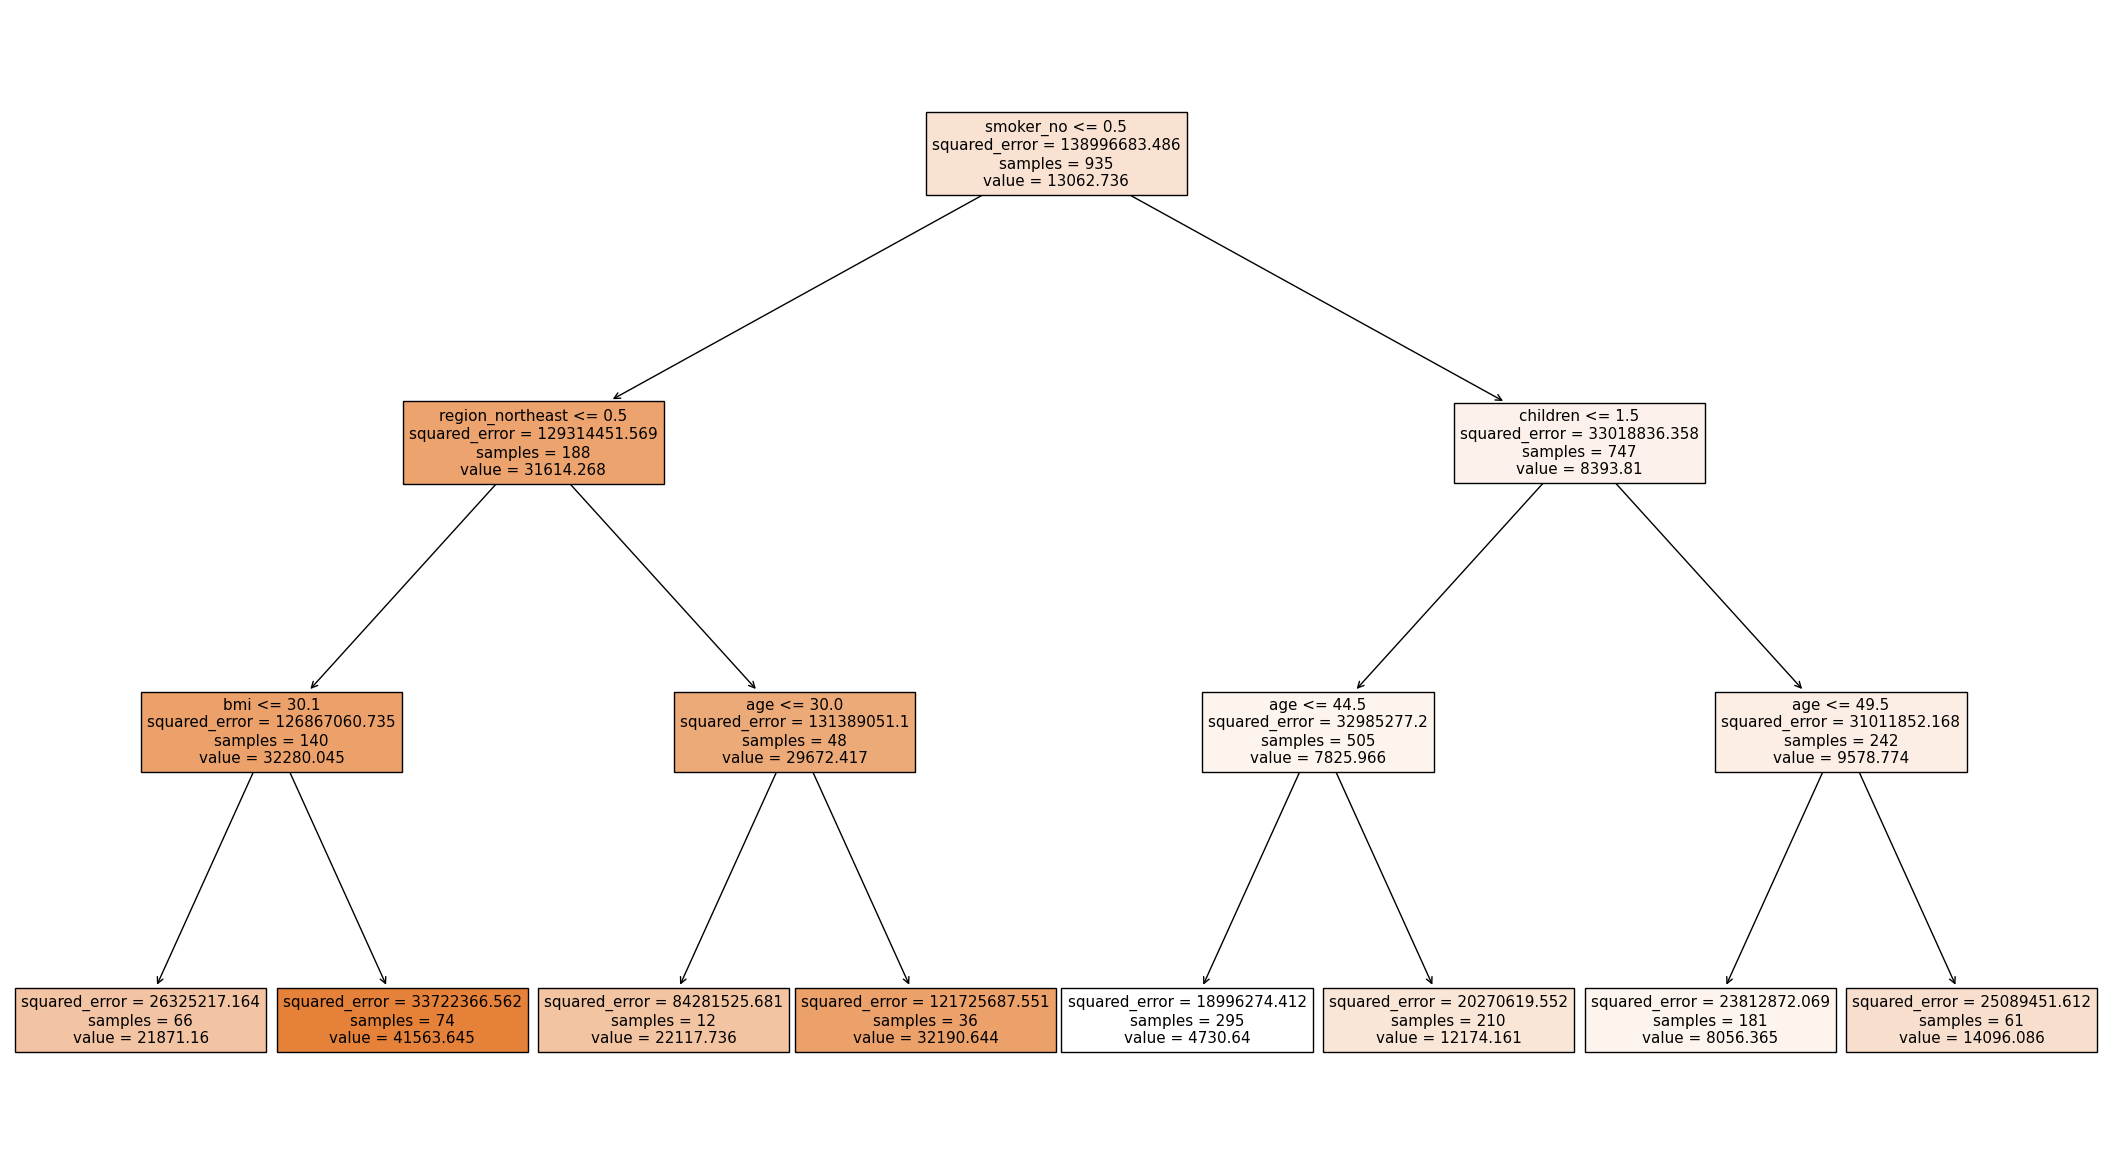

In [67]:
fig = plt.figure(figsize=(27,15))
_ = tree.plot_tree(tree_reg_mod, feature_names=list(X_train),filled=True)

In [68]:
r2_score(y_test, tree_reg_mod.predict(X_test))

0.8093498643873073

In [34]:
text_representation = tree.export_text(tree_reg_mod, feature_names=list(X_train))
print(text_representation)

|--- smoker_no <= 0.50
|   |--- bmi <= 30.10
|   |   |--- age <= 41.00
|   |   |   |--- bmi <= 28.49
|   |   |   |   |--- age <= 29.50
|   |   |   |   |   |--- value: [16681.59]
|   |   |   |   |--- age >  29.50
|   |   |   |   |   |--- value: [19914.30]
|   |   |   |--- bmi >  28.49
|   |   |   |   |--- bmi <= 28.60
|   |   |   |   |   |--- value: [35147.53]
|   |   |   |   |--- bmi >  28.60
|   |   |   |   |   |--- value: [19357.16]
|   |   |--- age >  41.00
|   |   |   |--- bmi <= 25.95
|   |   |   |   |--- children <= 0.50
|   |   |   |   |   |--- value: [26181.66]
|   |   |   |   |--- children >  0.50
|   |   |   |   |   |--- value: [22635.42]
|   |   |   |--- bmi >  25.95
|   |   |   |   |--- bmi <= 26.18
|   |   |   |   |   |--- value: [38245.59]
|   |   |   |   |--- bmi >  26.18
|   |   |   |   |   |--- value: [26977.54]
|   |--- bmi >  30.10
|   |   |--- age <= 28.50
|   |   |   |--- children <= 1.50
|   |   |   |   |--- region_southeast <= 0.50
|   |   |   |   |   |--- value:

In [31]:
# from mlxtend import plotting
# def decision_regions(data, target, classifier, figsize=(12, 8)):
#     plt.figure(figsize=figsize)
#     plotting.plot_decision_regions(X=data, y=target, clf=classifier, legend=2)
#     plt.scatter(data[:, 0], data[:, 1], c=["brg"[x] for x in target])

In [33]:
# decision_regions(np.array(X_train), np.array(y_train), tree_reg_mod)

ValueError: y must be an integer array. Found float64. Try passing the array as y.astype(np.int_)

<Figure size 1200x800 with 0 Axes>

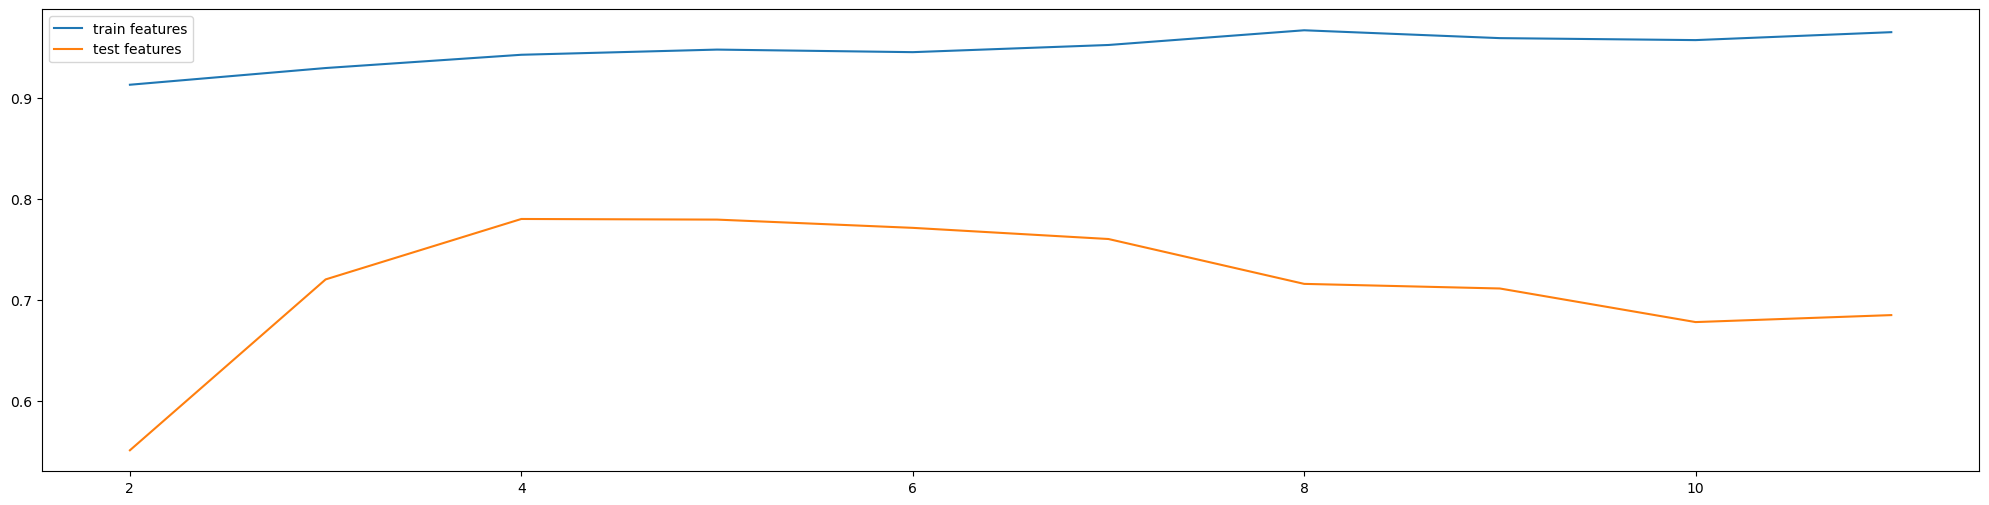

In [62]:
from sklearn.metrics import explained_variance_score, r2_score


# zakres parametru
max_depths = list(range(2, 15))
max_features = list(range(2,12))
# pusta lista do której będziemy "wkładać" accuracy dla zbioru treningowego
train_acc = []
# pusta lista dla zbioru testowego
test_acc = []

## w  każdym kroku pętli będziemy trenowali model dla danego parametru max_depths
# następnie sprawdzimy skuteczność na zbiorze testowym i treningowym
# tymi wartościami uzupełniać będziemy listy

# for depth in max_depths:
for feature in max_features:
    model = DecisionTreeRegressor(max_depth=depth, max_features=feature, random_state=0).fit(X_train, y_train)
    predict_train = model.predict(X_train)
    predict_test = model.predict(X_test)
    train_acc.append(r2_score(predict_train, y_train))
    test_acc.append(r2_score(predict_test, y_test))
    
## wyświetlamy wykres gdzie na osi x mamy parametry max_depths a na osi x accuracy
## osobnymi kolorami wyświetlimy wyniki na zbiorze treningowym i testowym
plt.figure(figsize = (25, 6))
# plt.plot(max_depths, train_acc, label = 'train depth')
plt.plot(max_features, train_acc, label = 'train features')
# plt.plot(max_depths, test_acc, label = 'test depth')
plt.plot(max_features, test_acc, label = 'test features')
plt.legend()
plt.show()

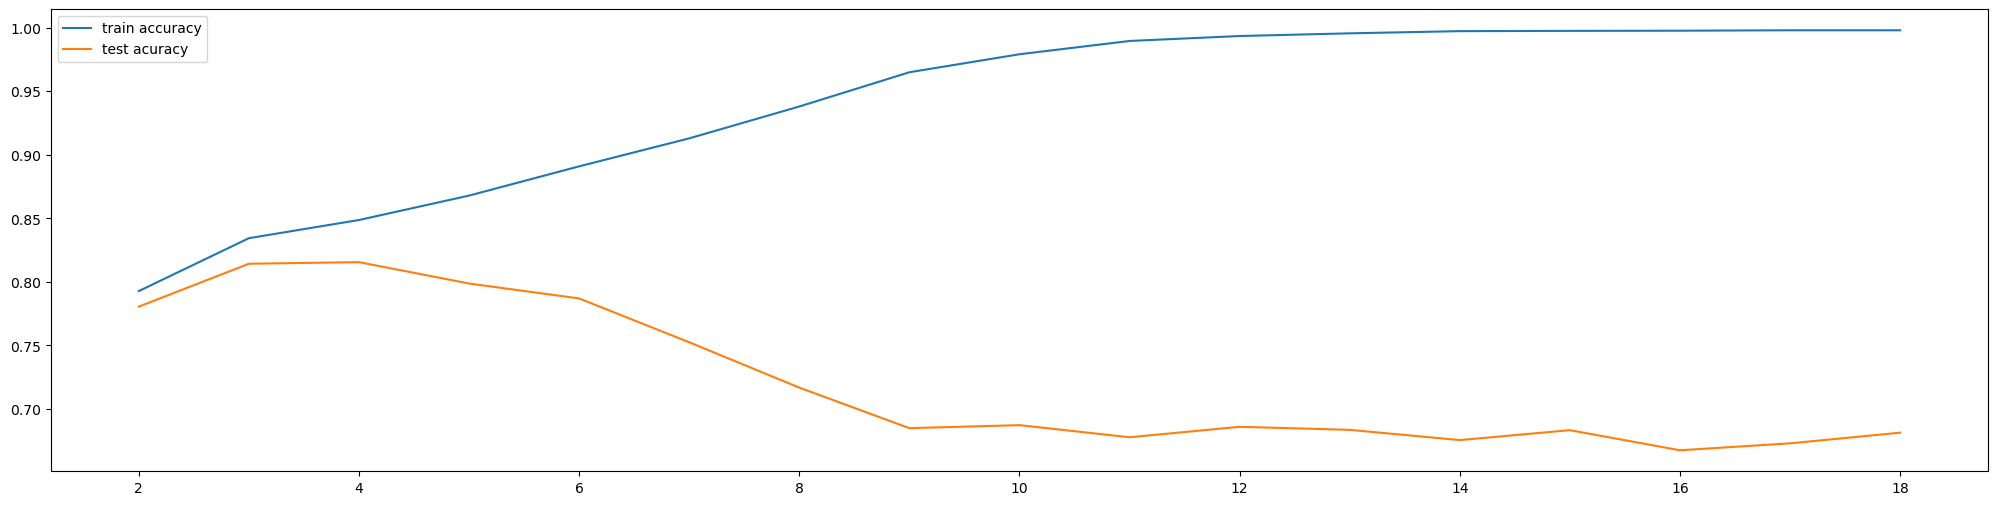

In [60]:
# zakres parametru
max_depths = list(range(2, 19))
# pusta lista do której będziemy "wkładać" accuracy dla zbioru treningowego
train_acc = []
# pusta lista dla zbioru testowego
test_acc = []

## w  każdym kroku pętli będziemy trenowali model dla danego parametru max_depths
# następnie sprawdzimy skuteczność na zbiorze testowym i treningowym
# tymi wartościami uzupełniać będziemy listy

for param in max_depths:
    model = DecisionTreeRegressor(max_depth=param, random_state=0).fit(X_train, y_train)
    predict_train = model.predict(X_train)
    predict_test = model.predict(X_test)
    train_acc.append(r2_score(predict_train, y_train))
    test_acc.append(r2_score(predict_test, y_test))
    
## wyświetlamy wykres gdzie na osi x mamy parametry max_depths a na osi x accuracy
## osobnymi kolorami wyświetlimy wyniki na zbiorze treningowym i testowym
plt.figure(figsize = (25, 6))
plt.plot(max_depths, train_acc, label = 'train accuracy')
plt.plot(max_depths, test_acc, label = 'test acuracy')
plt.legend()
plt.show()

In [37]:
max_depths

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]